# Project Overview

## 1.Business Understanding

### Business Overview
 
Syriatel (Arabic: سيريتل) is a leading telecommunications company in Syria, known for its rapid growth and extensive market presence. With a robust network of 63 Points of Service across the country, Syriatel handles over 25,000 customer queries daily through its Call Centers and operates 2,783 radio base stations. The company proudly serves over 6 million customers, holding a 55% share of the Syrian market. Their skilled team is committed to delivering high-quality services and solutions, solidifying Syriatel’s position as one of the region's fastest-growing telecom operators.

### Problem Statement

As new customers begin using a product, each contributes to the growth rate of that product. However, over time, some customers may discontinue their usage or cancel their subscriptions for various reasons. Churn refers to the rate at which customers cancel or choose not to renew their subscriptions, and a high churn rate can significantly impacts revenue.

Syriatel has observed an increase in customer churn and is concerned about the financial losses associated with customers who discontinue their services prematurely.


### Objectives

To Determine the features that serve as early indicators of customer churn.

To Analyze and identify the underlying reasons why customers discontinue their service.

To Build a Predictive Model. Develop a machine learning model capable of accurately predicting when a customer is likely to discontinue their service.

### Success Criteron

This analysis aims to:

Identify Key Features: Determine at least five key features that strongly correlate with customer churn, providing actionable insights for Syriatel to monitor and address customer dissatisfaction effectively.

Develop a Predictive Model: Build a classifier model that achieves:
At least 90% accuracy in predicting customer churn.
A minimum precision of 75%, ensuring the model minimizes false positives and provides reliable predictions.

Support Business Decision-Making: Enable Syriatel to use the identified features and model predictions to implement targeted retention strategies, reducing churn and mitigating revenue loss.


## 2.Data Understanding

The Churn in Telecom's dataset was sourced from [Kaggle](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). Each row represents a customer and columns represents customer details. 
First step, to import all the necessary libraries and classes used in this notebook. 
Note that the predefined classes and functions can be found in the [project_functions.py](project_functions.py) file in this repository.  

In [2]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#importing sklearn functions/classes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
#from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#importing my predefined functions/classes
from project_functions import visualizations, model_metrics, roc_curve_plotter

We began by loading and previewing the data:

In [3]:
#loading the compressed csv file into a dataframe and previewing the first 5 rows
df = pd.read_csv("archive.zip")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
#checking the column names
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

The dataset has 3333 rows and 21 columns. Each column represents a customer and the columns represent the customer details such as;
-  the `state` the cusomer lives in,
- `account length`- the number of days the customer has had an account, 
-  the `area code` of where the customer lives, 
-  the customer's `phone number`,
- `international plan`- true if the customer has the international plan, otherwise false, 
- `voice mail plan`- true if the customer has a voice mail plan, otherwise false, 
- `number vmail messages`- the number of voicemails the customer has sent,
- `total day minutes`- the total number of minutes the customer has been on call during the day, 
-  `total day calls`- total number of calls the user has done during the day, 
-  `total day charge`- total amount of money the customer was charged for calls during the day,
-  `total eve minutes`- the total number of minutes the customer has been on call in the evening, 
-  `total eve calls`- the total number of calls the customer has been on in the evening, 
-  `total eve charge` - total amount of money the customer was charged calls during the evening,
-  `total night minutes` - the total number of minutes the customer has been on call at night, 
-  `total night calls`- total number of calls the user has done at night, 
-  `total night charge`- total amount of money the customer was charged for calls at night,
-  `total intl minutes`- the total number of minutes the customer has been on international calls, 
-  `total intl calls`- total number of international calls the customer has done, 
-  `total intl charge`- total amount of money the customer was charged for international calls,
-  `customer service calls`- number of calls the customer has made to customer service, 
-  `churn`- true if the customer terminated their contract, otherwise false

let's now inspect the distributions of the numeric features:

In [5]:
#checking the statistical features of the numerical columns
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## 3.Data Preparation and Analysis

### Data Cleaning

First we check our data for duplicates, missing/NaN values and Outliers and handle them

In [6]:
#checking for duplicates
df.duplicated().sum()

0

In [7]:
#checking for missing values and the df composition
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

We notice that there are no duplicates or missing values in our data.

### Exploratory Data Analysis (EDA)


Univariate analysis 

To better understand the dataset, we will visualize the distributions of our numerical columns using distribution plots: 

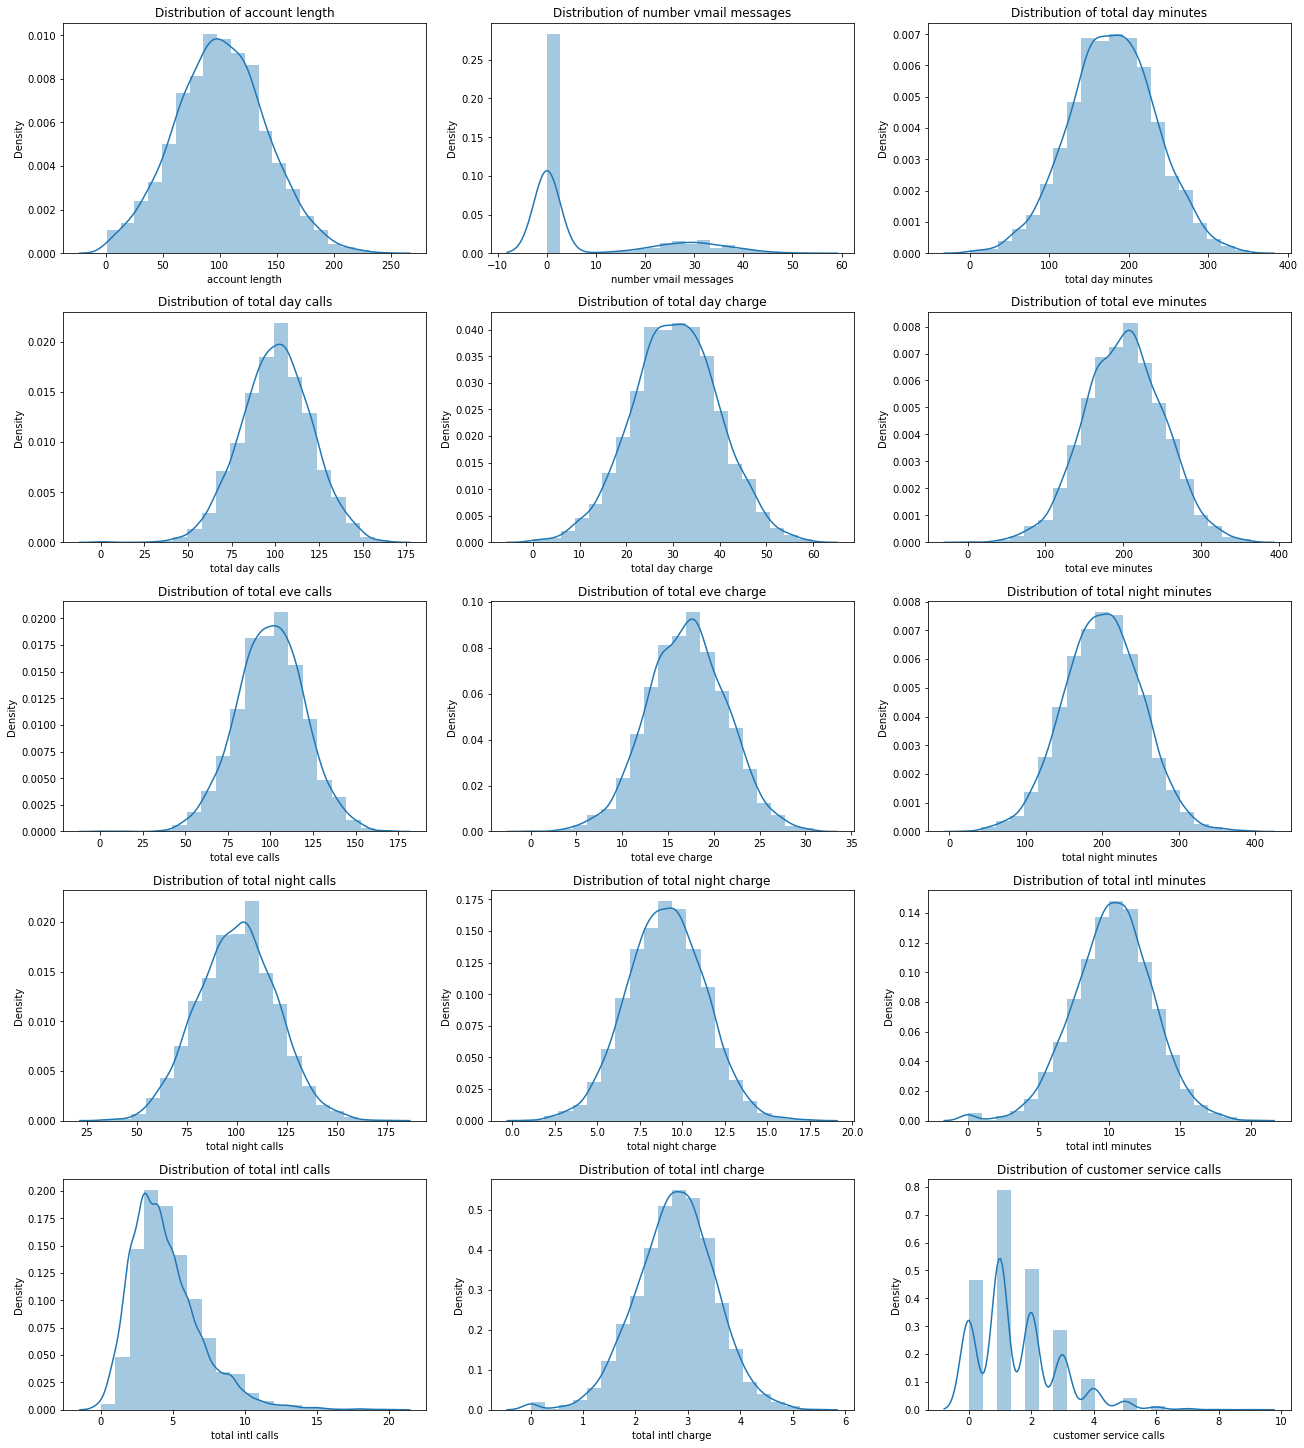

In [7]:
# defining numerical columns
numerical_columns = ['account length', 'number vmail messages', 'total day minutes',
                  'total day calls', 'total day charge', 'total eve minutes',
                  'total eve calls', 'total eve charge', 'total night minutes',
                  'total night calls', 'total night charge', 'total intl minutes',
                  'total intl calls', 'total intl charge', 'customer service calls']

#instantating the class and visualizing
visualizations(df, numerical_columns).visualize_univariate()

We observe that 12 out of the 15 numerical variables follow a normal distribution, which is advantageous for modeling purposes. 

Bivariate analysis

We will visualize the relationship between our categorical variables and the target variable `churn` using countplots.

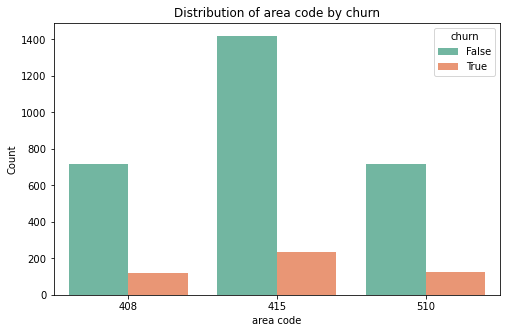

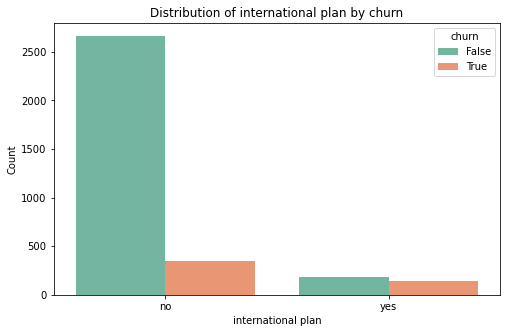

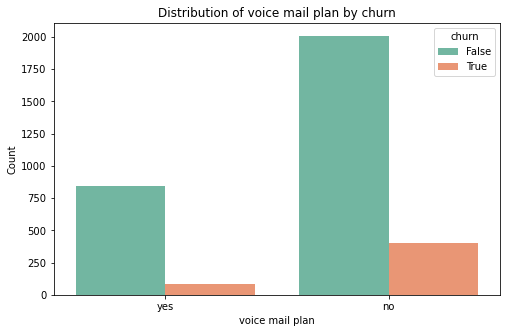

In [8]:
# Defining categorical columns and the target column
categorical_columns = ['area code', 'international plan', 'voice mail plan']
target_column = 'churn'

#using the class function to visualize
visualizations(df, categorical_columns).visualize_bivariate(target_column)

The count plots reveal that customers with an international plan and those without a voice mail plan are more likely to churn, suggesting these features may influence customer retention. However, area code does not appear to have a significant impact on churn, as the distribution is relatively consistent across different codes. These insights highlight the importance of service plans in understanding customer churn.

The columns, `phone number` and `state` contain unique values for each customer, therefore, they do not seem relevant in our analysis, so we'll drop them as well as the `area code` column

In [9]:
#dropping `phone number`, `state` and `area code` columns
df = df.drop(['phone number', 'state', 'area code'], axis=1)

We will convert the `churn` column into a binary format to align with our binary classification task. Additionally, we will apply one-hot encoding to the remaining categorical variables, ensuring they are represented in binary form. To prevent multicollinearity among the features, we will drop the first dummy category of each variable.

In [10]:
#One-hot-encoding the categorical columns
df = pd.get_dummies(df, columns=['international plan', 'voice mail plan'], drop_first=True, dtype=int)

#converting churn column into binary
df['churn'] = df['churn'].astype(int)

In [11]:
#checking the number of features from our dataframe
len(df.columns)-1

17

Having 17 features is quite high, so to simplify our dataset and retain only the most relevant features, we will merge the total minutes, calls, and charges into single combined columns for each category. This consolidation will reduce the number of columns from 12 to 3, streamlining the dataset for analysis.

In [12]:
# summing to create new columns for total minutes, calls and charge
df['total minutes'] = df['total day minutes']+df['total eve minutes']+df['total night minutes']+df['total intl minutes']
df['total calls'] = df['total day calls']+df['total eve calls']+df['total night calls']+df['total intl calls']
df['total charge'] = df['total day charge']+df['total eve charge']+df['total night charge']+df['total intl charge']

In [13]:
#dropping the consolidated columns
df = df.drop(['total day minutes','total day calls', 'total day charge', 'total eve minutes','total eve calls', 'total eve charge', 'total night minutes','total night calls', 'total night charge', 'total intl minutes','total intl calls', 'total intl charge'], axis=1)

#previewing the remaining columns
df.columns

Index(['account length', 'number vmail messages', 'customer service calls',
       'churn', 'international plan_yes', 'voice mail plan_yes',
       'total minutes', 'total calls', 'total charge'],
      dtype='object')

Multivariate Analysis

We will analyze the correlations among the remaining features to identify and address any multicollinearity, ensuring that our dataset is optimized for modeling.

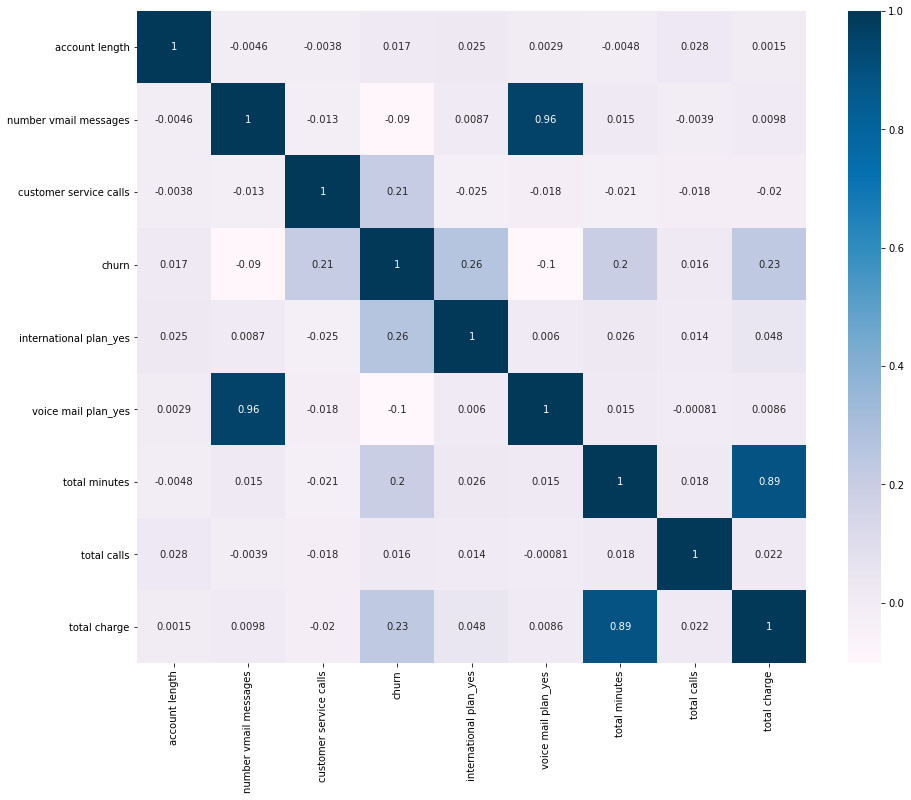

In [14]:
#plotting a correlation matrix for all columns
visualizations(df, df).visualize_multivariate()

The analysis reveals that most features in the dataset exhibit little to no correlation, suggesting that the majority of variables are independent and do not share linear relationships.
However we observe that the correlation between `voice mail plan_yes` & `number vmail messages` and between `total charge` & `total minutes` is quite high, therefore we'll take a look at each of their correlations to the target variable and drop the feature with the weaker correlation to ensure the dataset remains relevant and non-redundant.  

In [15]:
#checking the correlation coefficients
df.corr()['churn']

account length            0.016541
number vmail messages    -0.089728
customer service calls    0.208750
churn                     1.000000
international plan_yes    0.259852
voice mail plan_yes      -0.102148
total minutes             0.198607
total calls               0.015807
total charge              0.231549
Name: churn, dtype: float64

In [16]:
#dropping total minutes and number of vmail messages columns
df = df.drop(['number vmail messages', 'total minutes'], axis=1)

#checking the number of remaining features
len(df.columns)-1

6

Having completed the exploratory data analysis and ensured that the features are well-prepared, we can now move on to the modeling and evaluation.

## 4.Modeling and Evaluation

####  (Baseline Model) Logistic Regression Model

We will begin by constructing a simple logistic regression classifier as our baseline model.

In [17]:
#defining my target and features
y = df['churn']
X = df.drop(['churn'], axis=1)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# building a Logistic regression classifier model
baseline_model = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

#fitting the model
baseline_model.fit(X_train, y_train)

#predicting
baseline_y_pred = baseline_model.predict(X_test)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear') Model Metrics
______________________________
The accuracy score is 0.851.
The F1 score is 0.228.
The recall score is 0.154.
The precision score is 0.44.
______________________________


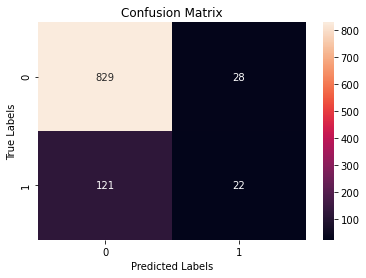

In [18]:
#evaluating my baseline model by instantating the predifined class
model_metrics(baseline_model, y_test, baseline_y_pred).get_summary()

our baseline model has a high accuracy score of 0.851 means the model correctly predicts 85.1% of the total instances. However, the low F1 score of 0.228 and recall of 0.154 suggest the model is struggling to identify churned customers, with only 15.4% of actual churn cases being detected. The precision of 0.44 means that 44% of the predicted churn cases were correct, highlighting a significant number of false positives. These metrics suggest that the model needs improvement, particularly in detecting churn effectively.

Next, let's explore how we can enhance our model's performance by examining the value counts of our target variable:

In [19]:
#checking our target variable balance
y.value_counts()

0    2850
1     483
Name: churn, dtype: int64

We notice that there is class imbalance and we will need to apply SMOTE(Synthetic Minority Oversampling) technique. We will apply it only to our train samples to avoid data leakage and to maintain the test sample distribution which immitates the real world distribution.

In [20]:
#instantating and fitting the train samples
X_train_sm, y_train_sm = SMOTE(random_state=42).fit_resample(X_train, y_train)

In [21]:
#checking the distribution after SMOTE
y_train_sm.value_counts()

1    1993
0    1993
Name: churn, dtype: int64

The class distribution of our target variable is now balanced.

#### MinMax Scaling
Next, we will normalize our features by applying Min-Max scaling, which transforms all feature values into a fixed range between 0 and 1. This ensures that all features are on the same scale. We will scale the training and testing data separately, using the statistics (min and max) from the training data to avoid data leakage from the test set. Min-Max scaling will also help mitigate the impact of outliers, as it is less sensitive to them.

In [22]:
#instantate the MinMaxScaler
scaler = MinMaxScaler()
## Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_sm)  
# Only transform test data
X_test_scaled = scaler.transform(X_test) 

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear') Model Metrics
______________________________
The accuracy score is 0.601.
The F1 score is 0.366.
The recall score is 0.804.
The precision score is 0.237.
______________________________


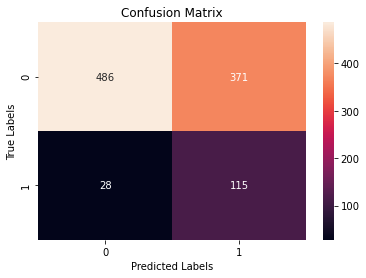

In [23]:
# build classifier for the modified values
modified_lr_model = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
modified_lr_model.fit(X_train_scaled, y_train_sm)
modified_lr_y_pred = modified_lr_model.predict(X_test_scaled)

model_metrics(modified_lr_model, y_test, modified_lr_y_pred).get_summary()

After applying SMOTE and MinMax scaling, the logistic regression model shows improved recall (80.4%) but lower precision (23.7%) and accuracy (60.1%) compared to the baseline. While the model is better at identifying churned customers, it tends to over-predict churn, leading to a higher number of false positives. Further adjustments are needed to balance recall and precision.

#### Decision Tree Classifier
To improve performance, we will build a Decision Tree Classifier model. We expect it to outperform the logistic regression model, as the relationships between our features are more nonlinear. Additionally, decision trees are robust to outliers, and feature scaling is not required. 

DecisionTreeClassifier(random_state=42) Model Metrics
______________________________
The accuracy score is 0.918.
The F1 score is 0.728.
The recall score is 0.769.
The precision score is 0.692.
______________________________


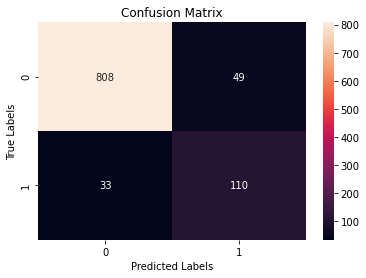

In [24]:
#building a decision tree classifier model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit and predict the model
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

#getting the model summary
model_metrics(dt_model, y_test, dt_y_pred).get_summary()

The Decision Tree Classifier outperforms the previous models with an accuracy of 91.8%, an F1 score of 0.728, and a recall of 76.9%. While precision is 69.2%, the model demonstrates a good balance between identifying churned customers and minimizing false positives, making it a strong model for predicting customer churn.

#### Random Forest Classifier
Next, we will build a RandomForestClassifier model. Random Forest is a robust ensemble technique that enhances accuracy, minimizes overfitting, handles complex datasets effectively, offers insights into feature importance, and is highly versatile for classification tasks.

RandomForestClassifier(random_state=42) Model Metrics
______________________________
The accuracy score is 0.945.
The F1 score is 0.791.
The recall score is 0.727.
The precision score is 0.867.
______________________________


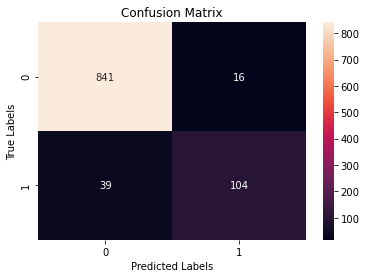

In [25]:
#building a random forest classifier
rfc = RandomForestClassifier(random_state=42)

#fitting the classifier
rfc.fit(X_train, y_train)

# Make predictions
rfc_y_pred = rfc.predict(X_test)

#getting the model summary
model_metrics(rfc, y_test, rfc_y_pred).get_summary()

The Random Forest Classifier performs excellently with an accuracy of 94.5%, an F1 score of 0.791, and precision of 86.7%. Although its recall is 72.7%, it still offers strong overall performance, making it the best model for predicting customer churn in this analysis.

#### Comparing the models

Based on the model summaries, including accuracy, F1 score, recall, and precision, we can already identify the top-performing model. However, to make a more precise comparison, we use the ROC curve and AUC. These metrics allow us to evaluate model performance across various classification thresholds, helping to assess the balance between true positive and false positive rates, while providing a single value (AUC) to quantify overall model effectiveness.

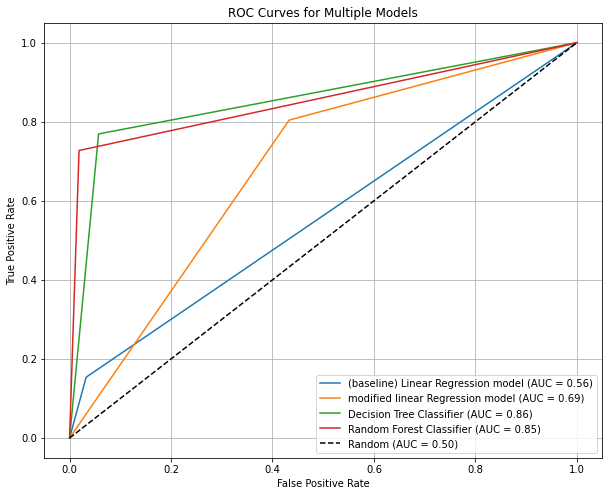

In [26]:
# Instantiate the roc_curve_plotter
roc_curve_plotter = roc_curve_plotter(y_test)

# Add models with their predicted values and model names
roc_curve_plotter.add_model(baseline_y_pred, "(baseline) Linear Regression model")
roc_curve_plotter.add_model(modified_lr_y_pred, "modified linear Regression model")
roc_curve_plotter.add_model(dt_y_pred, "Decision Tree Classifier")
roc_curve_plotter.add_model(rfc_y_pred, "Random Forest Classifier")

# Plot the ROC curves
roc_curve_plotter.plot()

The ROC curve analysis indicates that the Decision Tree and Random Forest classifiers are the top performers, with AUC scores of 0.86 and 0.85, respectively. These models outperform the linear regression models, which have AUC scores of 0.56 and 0.69. The random model, with an AUC of 0.50, shows no predictive value.

## 5.Conclusion

Through data analysis and model building, we identified key features such as 'account length', 'customer service calls', 'churn', 'international plan_yes', 'voice mail plan_yes', 'total calls', and 'total charge' that significantly predict customer churn. The Decision Tree Classifier performed well, while the Linear Regression model struggled despite SMOTE and MinMax scaling. The Random Forest Classifier excelled, achieving over 90% accuracy, demonstrating that ensemble methods like Random Forest, along with decision trees, are highly effective for churn prediction.

## Reccomendations


Enhance Feature Selection:
Further exploration of customer behavior and satisfaction related features could improve model accuracy in predicting churn and help identify key factors leading to service discontinuation.

Optimize Model Performance:
Fine-tuning the Random Forest and Decision Tree models, along with experimenting with alternative sampling techniques, can help improve prediction accuracy, especially in identifying at-risk customers.

Focus on Customer Retention Strategies:
Use the model's predictions to implement targeted retention efforts, such as personalized interventions or loyalty programs, and continuously monitor the model to ensure its effectiveness in predicting when customers are likely to discontinue their service.



### References

- [Worldfolio](https://www.theworldfolio.com/company/syriatel-syria/197/)
- [Kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/discussion/448926)
- [Productplan.com](https://www.productplan.com/glossary/churn/#:~:text=Definition%3A%20Churn%20is%20a%20measurement,with%20a%20product%20or%20service.)